In [2]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [3]:
resp = requests.get('https://www.gousto.co.uk/menu')

<bound method Tag.prettify of <!DOCTYPE doctype html>

<html>
<head>
<!-- ********************************************************************
        Well hello there. Like HTML, do ya? How about PHP? AWS? Git? Laravel?
        We're always looking for talented developers. Email us!
        workintech [at] gousto.co.uk
      ******************************************************************** -->
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<title data-react-helmet="true">This Week's Menu | Choose From Up To 40 Recipes | Gousto</title>
<meta content="294160790674968" data-react-helmet="true" property="fb:app_id"><meta content="100008548455745" data-react-helmet="true" property="fb:admins"><meta content="537082922" data-react-helmet="true" property="fb:admins"/><meta content="793975323" data-react-helmet="true" property="fb:admins"/><meta content="Gousto" data-react-helmet="t
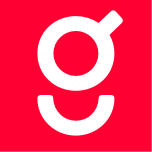
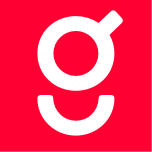
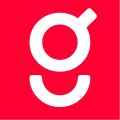
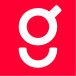

In [4]:
soup = BeautifulSoup(resp.content, 'html.parser')
print(soup.prettify)

In [5]:
recipe_title_container = soup.findAll('h2')
recipe_title_container[0]

<h2 class="Gb13b81 Gacce4c G182867" data-reactid="161"><!-- react-text: 162 -->Korean-Style Fried Chicken With Garlic Pak Choi<!-- /react-text --><span class="G4222ac Ga616ac G02c220 Gdeb30e" data-reactid="163"></span></h2>

In [6]:
recipe_title_container[0].text

'Korean-Style Fried Chicken With Garlic Pak Choi'

In [7]:
recipe_titles = []
for i in range(0, len(recipe_title_container)):
    recipe_titles.append(recipe_title_container[i].text)
recipe_titles
    

['Korean-Style Fried Chicken With Garlic Pak Choi',
 '10-Min Chicken & Black Bean Noodle Stir-Fry',
 'Malaysian Coconut Chicken & Pickled Cucumber',
 'Protein-Packed Chicken Milanese',
 'Fiesta Chicken Fajitas',
 'Chicken, Date & Tamarind Curry',
 'Mild Chicken Curry',
 'American Cheeseburger & Potato Wedges',
 'Baked Beef Meatballs With Tomato Sauce & Linguine',
 'Goan Fish & Spinach Curry, Coriander Rice',
 'Lamb Keema Saag, Nigella Rice & Naan',
 'Bánh Mì Style Chicken Salad & Sesame Croutons',
 'Classic Chilli Con Carne',
 'Creamy Chicken Potato-Topped Pie',
 'Comforting Cottage Pie',
 '10-Min Pulled Pork Ragù With Spaghetti',
 'Pork Belly With BBQ Sauce, Apple Slaw & Chips',
 'Pan-Fried Cod With Tomato & Caper Relish',
 'Sausages, Chips & Curry Sauce',
 'Bacon, Red Pesto & Broccoli Tortiglioni',
 "Extra Special Bangers 'N’ Mash",
 "Feel Good Fish 'N’ Chips",
 'Big Flavour Beef Lasagne',
 'Simply Perfect Spag Bol',
 '10-Min Nasi Goreng With Sriracha (V)',
 'Smoky Fish & Sweet Pota

In [8]:
recipe_description_container = soup.findAll(class_='G4cc08a G588f69 Gc4ecb0 G351fc6')
recipe_description_container[7].text

'\xa0\xa0Use within 2 - 3 days'

In [9]:
recipe_additional_info = []
for i in range(0, len(recipe_description_container)):
    info = re.sub('\xa0\xa0', '',recipe_description_container[i].text)
    recipe_additional_info.append(info)
recipe_additional_info[0:20]

['Takes 35 mins',
 'Use within 2 - 3 days',
 'Equipment required',
 '2/5 a day',
 'Takes 10 mins',
 'Use within 2 - 3 days',
 'Takes 40 mins',
 'Use within 2 - 3 days',
 'Equipment required',
 '1/5 a day',
 'Takes 35 mins',
 'Use within 4 - 5 days',
 'Equipment required',
 '2/5 a day',
 'Takes 20 mins',
 'Use within 3 - 4 days',
 '2/5 a day',
 'Takes 40 mins',
 'Use within 4 - 5 days',
 '2/5 a day']

In [10]:
recipe_additional_info = [x for x in recipe_additional_info if x != 'Equipment required']
recipe_additional_info = [x for x in recipe_additional_info if x != 'Vegetarian']
recipe_additional_info = [x for x in recipe_additional_info if x != 'Plant-based']

In [11]:
recipe_additional_info[0:20]

['Takes 35 mins',
 'Use within 2 - 3 days',
 '2/5 a day',
 'Takes 10 mins',
 'Use within 2 - 3 days',
 'Takes 40 mins',
 'Use within 2 - 3 days',
 '1/5 a day',
 'Takes 35 mins',
 'Use within 4 - 5 days',
 '2/5 a day',
 'Takes 20 mins',
 'Use within 3 - 4 days',
 '2/5 a day',
 'Takes 40 mins',
 'Use within 4 - 5 days',
 '2/5 a day',
 'Takes 25 mins',
 'Use within 2 - 3 days',
 '2/5 a day']

In [12]:
len(recipe_additional_info)

112

In [13]:
len(recipe_titles)

40

In [14]:
recipe_time_taken = [x for x in recipe_additional_info if x.startswith('Takes')]
recipe_use_by = [x for x in recipe_additional_info if x.startswith('Use')]
recipe_veg_portions = [x for x in recipe_additional_info if x.endswith('a day')]

In [15]:
print('length time taken:', len(recipe_time_taken))
print('length use by:', len(recipe_use_by))
print('length veg portions:', len(recipe_veg_portions))

length time taken: 40
length use by: 40
length veg portions: 32


In [17]:
df = pd.DataFrame([recipe_titles, recipe_time_taken, recipe_use_by]).transpose()
df.columns = ['Recipe Title', 'Time Required', 'Use By']
df

,Recipe Title,Time Required,Use By
0,Korean-Style Fried Chicken With Garlic Pak Choi,Takes 35 mins,Use within 2 - 3 days
1,10-Min Chicken & Black Bean Noodle Stir-Fry,Takes 10 mins,Use within 2 - 3 days
2,Malaysian Coconut Chicken & Pickled Cucumber,Takes 40 mins,Use within 2 - 3 days
3,Protein-Packed Chicken Milanese,Takes 35 mins,Use within 4 - 5 days
4,Fiesta Chicken Fajitas,Takes 20 mins,Use within 3 - 4 days
5,"Chicken, Date & Tamarind Curry",Takes 40 mins,Use within 4 - 5 days
6,Mild Chicken Curry,Takes 25 mins,Use within 2 - 3 days
7,American Cheeseburger & Potato Wedges,Takes 35 mins,Use within 3 - 4 days
8,Baked Beef Meatballs With Tomato Sauce & Linguine,Takes 45 mins,Use within 3 - 4 days
9,"Goan Fish & Spinach Curry, Coriander Rice",Takes 20 mins,Use within 3 - 4 days
